In [1]:
import numpy as np
import plotly.express as px
import pandas as pd
import time
from datetime import timedelta


In [2]:
# Load the data into different dataframes
full_cpu        = pd.read_csv('full cpu.csv')
full_mem        = pd.read_csv('full mem.csv')
full_network    = pd.read_csv('full network.csv')

# Drop a column from the full_cpu DataFrame
full_cpu.drop('test-telegraf-5f485b9f58-j7gpc', axis=1, inplace=True)
full_cpu.drop('test-7595f9459c-gscnj', axis=1, inplace=True)
full_cpu.drop('riego-rest-deploy-8656c786b5-65sl9', axis=1, inplace=True)
full_cpu.drop('proxy-husky-deploy-dc7bd4b55-lxjrj', axis=1, inplace=True)
#Set time as index
full_cpu['Time'] = [timedelta(seconds=i * 15).__str__() for i in range(len(full_cpu))]
full_cpu.set_index('Time', inplace=True)
full_cpu["Combined"] = full_cpu[full_cpu.keys()].sum(axis=1)


# Drop a column from the full_mem DataFrame
full_mem.drop('test-telegraf-5f485b9f58-j7gpc', axis=1, inplace=True)
full_mem.drop('test-7595f9459c-gscnj', axis=1, inplace=True)
full_mem.drop('riego-rest-deploy-8656c786b5-65sl9', axis=1, inplace=True)
full_mem.drop('proxy-husky-deploy-dc7bd4b55-lxjrj', axis=1, inplace=True)
#Set time as index
full_mem['Time'] = [timedelta(seconds=i * 15).__str__() for i in range(len(full_mem))]
full_mem.set_index('Time', inplace=True)
full_mem = full_mem.apply(lambda x: x/1000000)
full_mem["Combined"] = full_mem[full_mem.keys()].sum(axis=1)


# Drop a column from the full_cpu DataFrame
full_network.drop('test-telegraf-5f485b9f58-j7gpc', axis=1, inplace=True)
full_network.drop('test-7595f9459c-gscnj', axis=1, inplace=True)
full_network.drop('riego-rest-deploy-8656c786b5-65sl9', axis=1, inplace=True)
full_network.drop('proxy-husky-deploy-dc7bd4b55-lxjrj', axis=1, inplace=True)
#Set time as index
full_network['Time'] = [timedelta(seconds=i * 15).__str__() for i in range(len(full_network))]
full_network.set_index('Time', inplace=True)
full_network = full_network.apply(lambda x: x/1000000)
full_network["Combined"] = full_network[full_network.keys()].sum(axis=1)


# Full platform
### CPU

In [3]:
full_cpu.head()

,dt-ditto-connectivity-8f87565b5-wcfcx,dt-ditto-gateway-b8bc786db-g7zj8,dt-ditto-nginx-dd7b6f757-d9mtr,dt-ditto-policies-69f9fcdfd4-x5mfd,dt-ditto-things-54dd7f979c-wklmh,dt-ditto-thingssearch-68bfd8748d-4vll6,dt-extended-api-for-ditto-76b6646c64-hpcvl,dt-grafana-694bf998f-m4rzt,dt-hono-adapter-amqp-6d7689b56d-7tk69,dt-hono-adapter-http-769f6c5c69-4xqdn,...,dt-hono-service-command-router-9776ff97b-956gs,dt-hono-service-device-registry-7cff889d64-qshkr,dt-influxdb-influxdb2-0,dt-mongodb-57956bf8d8-ck9j2,dt-mosquitto-77445d4957-tqqzl,dt-telegraf-578c4f4685-sl8xq,dt-telegraf-578c4f4685-sqgpp,dt-telegraf-578c4f4685-t5982,fmi-rest-deploy-6d5b49bfcc-h7cdk,Combined
Time,,,,,,,,,,,,,,,,,,,,,
0:00:00,64.452270,4.203510,0,4.297271,4.176160,3.916238,0.013802,2.322161,0.643689,0.648565,...,0.723926,0.226549,1.026155,27.171588,0.060361,0.676106,0.288303,0.293231,0,115.263805
0:00:15,64.751685,4.191707,0,4.246097,4.188688,3.845055,0.013614,2.297403,0.643989,0.648027,...,0.725715,0.223998,1.021276,27.553328,0.061111,0.676044,0.288292,0.304517,0,115.803998
0:00:30,65.132346,4.189681,0,4.213168,4.188303,3.814944,0.013844,2.345894,0.646424,0.647758,...,0.725032,0.215569,1.038804,26.437834,0.060594,0.653403,0.287995,0.302722,0,115.036163
0:00:45,65.344268,4.175043,0,4.140389,4.182827,3.739686,0.012988,2.403638,0.647272,0.648993,...,0.727776,0.223811,1.037111,27.261229,0.061238,0.689166,0.275815,0.297694,0,115.991859
0:01:00,65.410170,4.195472,0,4.091640,4.209596,3.654103,0.013277,2.367337,0.647791,0.653326,...,0.726484,0.225669,1.132374,27.455527,0.061405,0.672778,0.275363,0.288069,0,116.202854


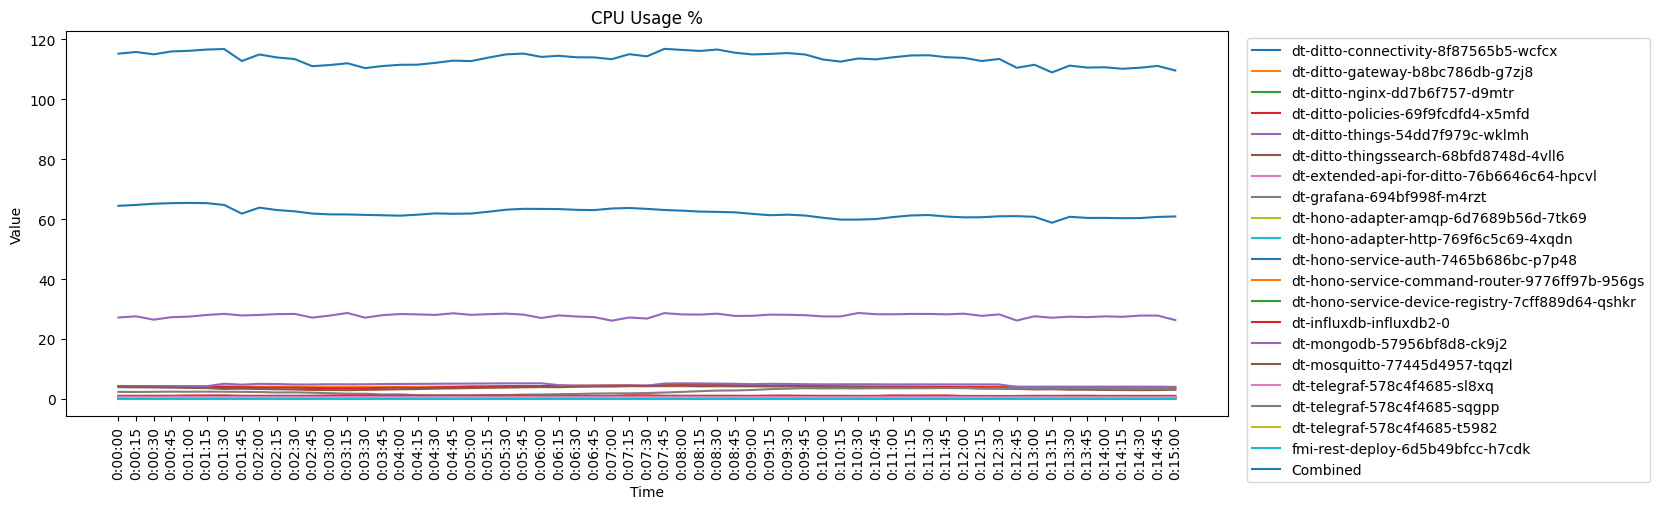

In [4]:
# Plot using matplotlib
plt.figure(figsize=(15, 5))
plt.plot(full_cpu.index, full_cpu)
plt.xlabel('Time')
plt.xticks(rotation=90)
plt.ylabel('Value')
plt.title('CPU Usage %')
plt.legend(full_cpu.keys(), bbox_to_anchor=(1.01, 1), loc="upper left")
plt.show()

# Plot using plotly
fig = px.line(full_cpu, x=full_cpu.index, y=full_cpu.keys(), title='CPU Usage %')
fig.show()


### Memory

In [5]:
full_mem.head()

,dt-ditto-connectivity-8f87565b5-wcfcx,dt-ditto-gateway-b8bc786db-g7zj8,dt-ditto-nginx-dd7b6f757-d9mtr,dt-ditto-policies-69f9fcdfd4-x5mfd,dt-ditto-things-54dd7f979c-wklmh,dt-ditto-thingssearch-68bfd8748d-4vll6,dt-extended-api-for-ditto-76b6646c64-hpcvl,dt-grafana-694bf998f-m4rzt,dt-hono-adapter-amqp-6d7689b56d-7tk69,dt-hono-adapter-http-769f6c5c69-4xqdn,...,dt-hono-service-command-router-9776ff97b-956gs,dt-hono-service-device-registry-7cff889d64-qshkr,dt-influxdb-influxdb2-0,dt-mongodb-57956bf8d8-ck9j2,dt-mosquitto-77445d4957-tqqzl,dt-telegraf-578c4f4685-sl8xq,dt-telegraf-578c4f4685-sqgpp,dt-telegraf-578c4f4685-t5982,fmi-rest-deploy-6d5b49bfcc-h7cdk,Combined
Time,,,,,,,,,,,,,,,,,,,,,
0:00:00,1029.885952,554.340352,11.247616,623.095808,654.970880,537.083904,68.980736,111.271936,274.669568,273.7152,...,383.483904,288.792576,1121.304576,2054.127616,6.217728,207.29856,206.516224,205.96736,2.220032,8831.897600
0:00:15,1029.156864,554.455040,11.247616,623.357952,654.991360,537.325568,68.997120,115.269632,274.669568,273.7152,...,383.483904,288.792576,1121.304576,2053.890048,6.217728,207.29856,206.516224,205.96736,2.220032,8835.584000
0:00:30,1029.525504,554.344448,11.247616,623.230976,655.233024,537.309184,69.029888,115.609600,274.669568,273.7152,...,383.483904,288.792576,1121.304576,2054.000640,6.217728,207.29856,206.516224,205.96736,2.220032,8836.423680
0:00:45,1029.271552,554.344448,11.247616,623.116288,654.991360,537.182208,69.054464,117.170176,274.669568,273.7152,...,383.483904,288.792576,1121.304576,2116.227072,6.217728,207.29856,206.516224,205.96736,2.220032,8899.497984
0:01:00,1029.484544,554.344448,11.247616,623.136768,654.995456,537.182208,69.070848,117.776384,274.669568,273.7152,...,383.483904,288.792576,1121.304576,2088.275968,6.217728,207.29856,206.516224,205.96736,2.220032,8872.407040


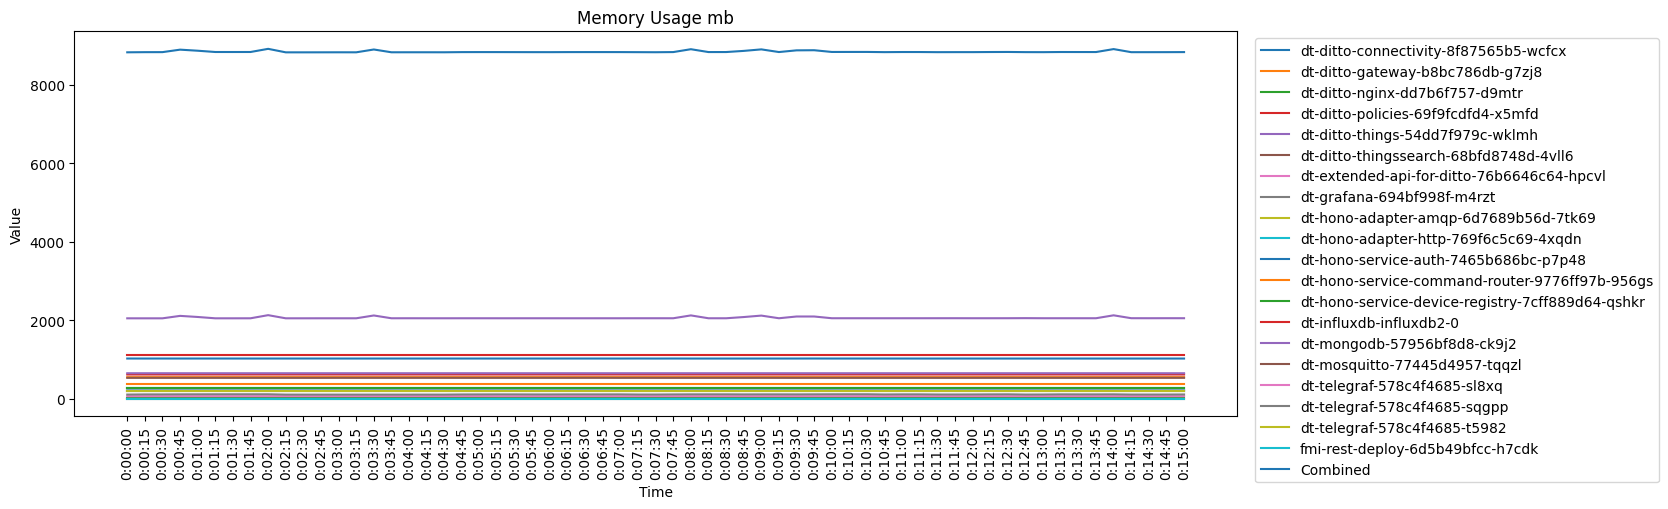

In [6]:
# Plot using matplotlib
plt.figure(figsize=(15, 5))
plt.plot(full_mem.index, full_mem)
plt.xlabel('Time')
plt.xticks(rotation=90)
plt.ylabel('Value')
plt.title('Memory Usage mb')
plt.legend(full_mem.keys(), bbox_to_anchor=(1.01, 1), loc="upper left")
plt.show()

# Plot using plotly
fig = px.line(full_mem, x=full_mem.index, y=full_mem.keys(), title='Memory Usage mb')
fig.show()

### Network

In [7]:
full_network.head()

,dt-ditto-connectivity-8f87565b5-wcfcx,dt-ditto-gateway-b8bc786db-g7zj8,dt-ditto-nginx-dd7b6f757-d9mtr,dt-ditto-policies-69f9fcdfd4-x5mfd,dt-ditto-things-54dd7f979c-wklmh,dt-ditto-thingssearch-68bfd8748d-4vll6,dt-extended-api-for-ditto-76b6646c64-hpcvl,dt-grafana-694bf998f-m4rzt,dt-hono-adapter-amqp-6d7689b56d-7tk69,dt-hono-adapter-http-769f6c5c69-4xqdn,...,dt-hono-service-command-router-9776ff97b-956gs,dt-hono-service-device-registry-7cff889d64-qshkr,dt-influxdb-influxdb2-0,dt-mongodb-57956bf8d8-ck9j2,dt-mosquitto-77445d4957-tqqzl,dt-telegraf-578c4f4685-sl8xq,dt-telegraf-578c4f4685-sqgpp,dt-telegraf-578c4f4685-t5982,fmi-rest-deploy-6d5b49bfcc-h7cdk,Combined
Time,,,,,,,,,,,,,,,,,,,,,
0:00:00,0.196991,0.009442,0.0,0.009938,0.010733,0.010683,0.000074,0.015707,0.000993,0.000996,...,0.000752,0.000561,0.000092,0.001058,0.000088,0.000442,0.000043,0.000043,0.0,0.258785
0:00:15,0.206306,0.009521,0.0,0.009591,0.010466,0.010152,0.000076,0.015573,0.000991,0.000994,...,0.000799,0.000560,0.000091,0.001029,0.000087,0.000442,0.000043,0.000043,0.0,0.266909
0:00:30,0.206761,0.009612,0.0,0.009905,0.010519,0.009340,0.000074,0.015540,0.000992,0.000990,...,0.000796,0.000559,0.000090,0.001039,0.000088,0.000442,0.000043,0.000043,0.0,0.266985
0:00:45,0.211187,0.009593,0.0,0.009823,0.022597,0.009452,0.000077,0.015717,0.000995,0.000994,...,0.000797,0.000561,0.000092,0.005877,0.000089,0.000442,0.000043,0.000043,0.0,0.288526
0:01:00,0.217649,0.009433,0.0,0.009644,0.021740,0.008890,0.000078,0.015703,0.000993,0.000993,...,0.000769,0.000546,0.000092,0.005849,0.000088,0.000442,0.000043,0.000043,0.0,0.293146


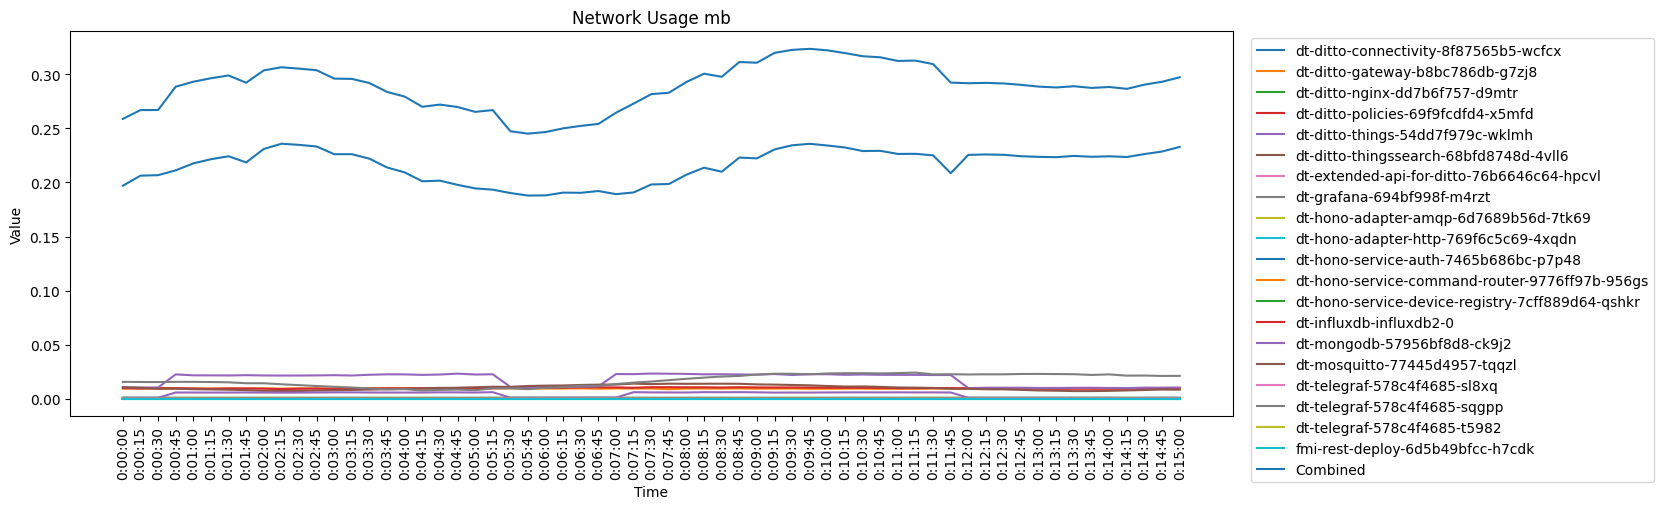

In [8]:
# Plot using matplotlib
plt.figure(figsize=(15, 5))
plt.plot(full_network.index, full_network)
plt.xlabel('Time')
plt.xticks(rotation=90)
plt.ylabel('Value')
plt.title('Network Usage mb')
plt.legend(full_network.keys(), bbox_to_anchor=(1.01, 1), loc="upper left")
plt.show()

# Plot using plotly
fig = px.line(full_network, x=full_network.index, y=full_network.keys(), title='Network Usage mb')
fig.show()

### Combining total measurements into one dataset

In [9]:
# Combine one column from each dataframe into a new dataframe
# Select the desired columns from each dataframe
column_cpu = full_cpu['Combined']
column_mem = full_mem['Combined']
column_network = full_network['Combined']

# Combine the selected columns into a new dataframe
combined_df = pd.concat([column_cpu, column_mem, column_network], axis=1)
combined_df.columns = ['CPU', 'Memory', 'Network']
combined_df['Time'] = combined_df.index

# combined_df.set_index('Time', inplace=True)
# Print the combined dataframe
print(combined_df)

combined_df.to_csv('full_combined.csv', index=False)

           Combined     Combined  Combined
Time                                      
0:00:00  115.263805  8831.897600  0.258785
0:00:15  115.803998  8835.584000  0.266909
0:00:30  115.036163  8836.423680  0.266985
0:00:45  115.991859  8899.497984  0.288526
0:01:00  116.202854  8872.407040  0.293146
...             ...          ...       ...
0:14:00  110.708722  8913.850368  0.288243
0:14:15  110.208693  8835.383296  0.286554
0:14:30  110.563823  8835.411968  0.290419
0:14:45  111.154814  8836.009984  0.293088
0:15:00  109.635230  8837.365760  0.297211

[61 rows x 3 columns]
